<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/X_Bar_and_R_Control_Chart_simulation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
This code demonstrates how you can plot X-bar and R Control Charts
Note that this code should work for the Phase I of control charting
Other real-time process monitoring software should be used for Phase II of control charting
Ref. https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics


In [ ]:
# Set random seed
# To use your own data set, you should read it in and make sure to conver x into a two dimensional array
# here is the syntax numpy_array = df.to_numpy(); so x is the numpy_array and df is the csv file imported
# skip this step to use your own data
np.random.seed(42)

# Create dummy data
# x is N(10, 2^2) with a sample of 5 obs m=10
x = np.array([list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=17, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5))])
x

array([[10.99342831,  9.7234714 , 11.29537708, 13.04605971,  9.53169325],
       [ 9.53172609, 13.15842563, 11.53486946,  9.06105123, 11.08512009],
       [ 9.07316461,  9.06854049, 10.48392454,  6.17343951,  6.55016433],
       [ 8.87542494,  7.97433776, 10.62849467,  8.18395185,  7.1753926 ],
       [12.93129754,  9.5484474 , 10.13505641,  7.15050363,  8.91123455],
       [17.22184518, 14.69801285, 17.75139604, 15.79872262, 16.4166125 ],
       [ 8.79658678, 13.70455637,  9.97300555,  7.88457814, 11.64508982],
       [ 7.5583127 , 10.41772719,  6.08065975,  7.3436279 , 10.39372247],
       [11.47693316, 10.34273656,  9.76870344,  9.39779261,  7.04295602],
       [ 8.56031158,  9.07872246, 12.11424445, 10.68723658,  6.47391969]])

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

[10.918005948650173, 10.874238498144853, 8.269846699204994, 8.56752036246535, 9.735307904953721, 16.377317836368462, 10.40076333227556, 8.358810003249861, 9.605824357136171, 9.382886952428057]
points in x,  10


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

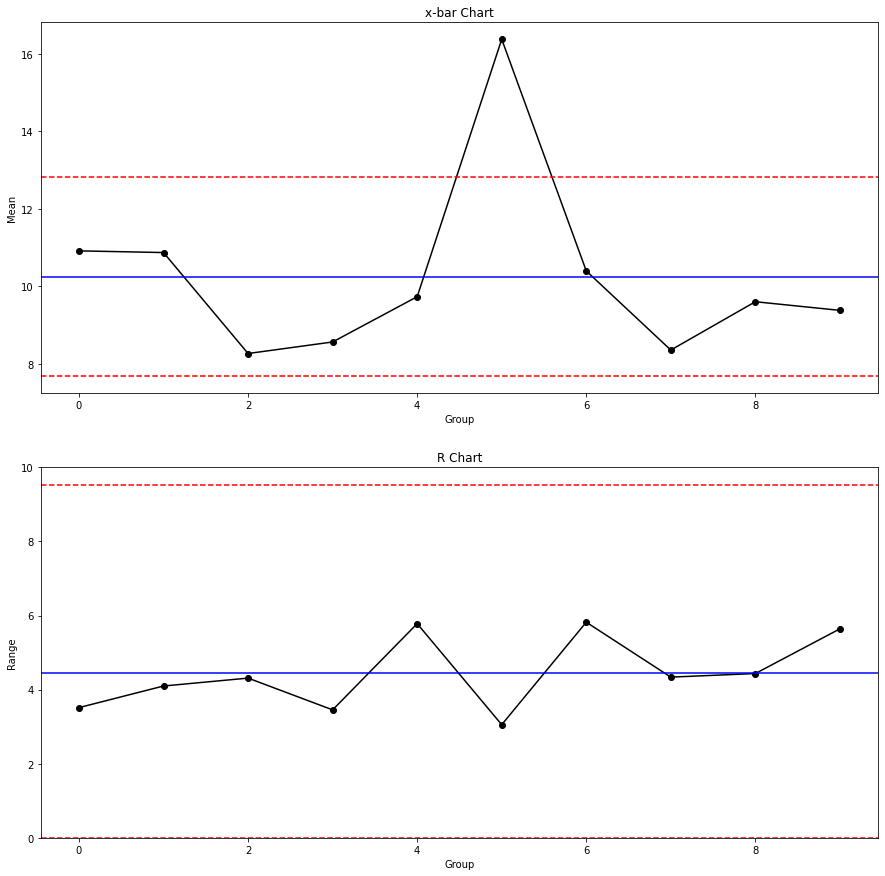

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [ ]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 5 out of mean control limits!


In [ ]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


Your Turn: can you modify this code and plot X-bar and S chart?